# Predictions for Job Salaries within the San Francisco City Government

![San Francisco City Hall](data\cityhall.png)

Our goal is to use the SF Salaries dataset from kaggle to predict total salaries of the top 50 most populated jobs. From the data we have received, our goal is to narrow down the solely on the main salary aside from the other forms of payments such as Overtime, Benefits and other that is included. Using the ID, Job Title and Base Pay from the original data set, and creating new columns such as Job Categories/Encoded and the total, average, minimum, maximum, mean and standard deviation of the base pay - this will help prepare for the models in predicting of salaries within the job categories created. 

In [1]:
#Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
#Define and load file 
salaries_path = "data/Salaries.csv"
salaries = pd.read_csv(salaries_path)

#Display sample data 
salaries.head(50)

C:\Users\alexa\AppData\Local\Temp\ipykernel_22360\4207225404.py:3: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  salaries = pd.read_csv(salaries_path)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


## Data Transformation: 

The dataset we chose did not have consistent inputs. To fix this, we decided to have employee names and job titles in lowercase as data from 2011 were all uppercase versus data from 2012 - 2014 as well as replaced roman numerals with numbers for consistency.

Several counts were run to understand the amount of data we had for analysis.



In [3]:
# Converting into lowercase
salaries['JobTitle'] = salaries['JobTitle'].str.lower()
salaries['EmployeeName'] = salaries['EmployeeName'].str.lower()


In [4]:
# Counting the number of IDs included in the dataset
num_id = salaries['Id'].nunique()
num_id

148654

In [5]:
# Counting the number of people in the dataset
num_people = salaries['EmployeeName'].nunique()
num_people

80459

In [6]:
# Shows the years in the dataset
unique_years = salaries['Year'].unique()
unique_years

array([2011, 2012, 2013, 2014], dtype=int64)

This section is replacing all of the different job title position rank from roman numerals to regular numbers. There are different rankings within each job title ( example: manager 2, manager 3)

In [7]:
salaries['JobTitle'] = salaries['JobTitle'].str.replace(' v ', ' 5')
salaries['JobTitle'] = salaries['JobTitle'].str.replace('iiii', '4')
salaries['JobTitle'] = salaries['JobTitle'].str.replace('iii', '3')
salaries['JobTitle'] = salaries['JobTitle'].str.replace('ii', '2')
salaries['JobTitle'] = salaries['JobTitle'].str.replace(' i', '1')

In [8]:
#Display DataFrame
salaries.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,nathaniel ford,general manager-metropolitan transit authority,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,gary jimenez,captain 3 (police department),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,albert pardini,captain 3 (police department),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,christopher chong,wire rope cable maintenance mechanic,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,patrick gardner,"deputy chief of department,(fire department)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


There are multiple "Not provided" values throughout many of the columns, so we removed those rows to allow a more accurate dataset.

In [9]:
#Removing unwanted rows
salaries = salaries[~salaries['JobTitle'].isin(['Not provided', 'Not Provided']) & 
                  ~salaries['EmployeeName'].isin(['Not provided', 'Not Provided']) & 
                  ~salaries['OvertimePay'].isin(['Not provided', 'Not Provided']) & 
                  ~salaries['OtherPay'].isin(['Not provided', 'Not Provided']) & 
                  ~salaries['BasePay'].isin(['Not provided', 'Not Provided'])]

print("\nDataFrame after removing unwanted rows:")
salaries


DataFrame after removing unwanted rows:


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,nathaniel ford,general manager-metropolitan transit authority,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,gary jimenez,captain 3 (police department),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,albert pardini,captain 3 (police department),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,christopher chong,wire rope cable maintenance mechanic,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,patrick gardner,"deputy chief of department,(fire department)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,carolyn a wilson,human services technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148647,148648,joann anderson,communications dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,leon walker,custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,roy i tillery,custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT


In [10]:
#
num_job = salaries['JobTitle'].nunique()
num_job

1579

Displayed here is a show of the highest to lowest count of people in these Job Titles.

In [11]:
relative_counts = salaries['JobTitle'].value_counts(normalize=False)
relative_counts.head(50)

JobTitle
transit operator                       9424
special nurse                          5791
registered nurse                       4955
custodian                              3214
police officer 3                       3200
firefighter                            3153
recreation leader                      2663
deputy sheriff                         2618
public svc aide-public works           2518
patient care assistant                 1945
public service trainee                 1656
attorney (civil/criminal)              1503
police officer 2                       1502
police officer                         1476
porter                                 1465
general laborer                        1410
gardener                               1187
parking control officer                1140
library page                           1107
senior clerk                           1064
senior clerk typist                    1055
sergeant 3                             1047
clerk                  

In [12]:
#Dropping Notes 
salaries = salaries.drop('Notes', axis = 1)
salaries

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,nathaniel ford,general manager-metropolitan transit authority,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,2,gary jimenez,captain 3 (police department),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,3,albert pardini,captain 3 (police department),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,4,christopher chong,wire rope cable maintenance mechanic,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,5,patrick gardner,"deputy chief of department,(fire department)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,carolyn a wilson,human services technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,PT
148647,148648,joann anderson,communications dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,PT
148648,148649,leon walker,custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,PT
148649,148650,roy i tillery,custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,PT


Cleaning/filtering names - this section is to make the names more easier to code as some names included middle initials, whereas some were first and last name. We wanted to keep it first and last name only. 

In [13]:
def remove_middle_initial(name):
    parts = name.split()
    if len(parts) == 3 and len(parts[1]) == 1:  # Check for exactly 3 parts and middle part is 1 letter
        return f"{parts[0]} {parts[2]}"  # Keep first and last name
    return name  # Return as is if conditions are not met

# Apply the function to the EmployeeName column
salaries['EmployeeName'] = salaries['EmployeeName'].apply(remove_middle_initial)

# Display the modified DataFrame
salaries

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,nathaniel ford,general manager-metropolitan transit authority,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,2,gary jimenez,captain 3 (police department),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,3,albert pardini,captain 3 (police department),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,4,christopher chong,wire rope cable maintenance mechanic,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,5,patrick gardner,"deputy chief of department,(fire department)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,carolyn wilson,human services technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,PT
148647,148648,joann anderson,communications dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,PT
148648,148649,leon walker,custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,PT
148649,148650,roy tillery,custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,PT


This section is was for us to understand the duplications of names in the data. There are duplications due to people having the same name and/or people working multiple years in either working in the same job title and/or working a different job title. 

In [14]:
name_counts = salaries['EmployeeName'].value_counts()

# Display counts of names that are duplicates
duplicates = name_counts[name_counts > 1]

print("Duplicate names and their counts:")
print(duplicates)

Duplicate names and their counts:
EmployeeName
richard lee           29
kevin lee             29
david wong            28
michael brown         27
william wong          24
                      ..
harriette jackson      2
sherelle gardner       2
tamara bryan           2
michelle de grasse     2
jormah lohr            2
Name: count, Length: 37041, dtype: int64


In [15]:
duplicates.head(30)

EmployeeName
richard lee        29
kevin lee          29
david wong         28
michael brown      27
william wong       24
michael lee        24
stanley lee        23
william lee        22
michael wong       22
john chan          21
alan wong          20
john murphy        20
juan garcia        20
steven lee         20
jose lopez         19
david lee          19
kevin smith        18
michael johnson    18
jose hernandez     18
john miller        17
jennifer chiu      17
michael smith      17
david chan         17
raymond lee        17
jeffrey lee        16
john lee           16
linda lee          16
james wilson       16
victor lee         16
vincent wong       16
Name: count, dtype: int64

Dropping data so we have the set dataframe that we are aiming for. 

In [16]:

salaries = salaries.drop('Status', axis=1)
salaries = salaries.drop('Benefits', axis=1)
salaries = salaries.drop('Agency', axis=1)


In [17]:
salaries = salaries.set_index('Id')
salaries

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
Id,,,,,,,,
1,nathaniel ford,general manager-metropolitan transit authority,167411.18,0.0,400184.25,567595.43,567595.43,2011
2,gary jimenez,captain 3 (police department),155966.02,245131.88,137811.38,538909.28,538909.28,2011
3,albert pardini,captain 3 (police department),212739.13,106088.18,16452.6,335279.91,335279.91,2011
4,christopher chong,wire rope cable maintenance mechanic,77916.0,56120.71,198306.9,332343.61,332343.61,2011
5,patrick gardner,"deputy chief of department,(fire department)",134401.6,9737.0,182234.59,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...
148646,carolyn wilson,human services technician,0.00,0.00,0.00,0.00,0.00,2014
148648,joann anderson,communications dispatcher 2,0.00,0.00,0.00,0.00,0.00,2014
148649,leon walker,custodian,0.00,0.00,0.00,0.00,0.00,2014


This section is dividing the dataframe into different years to get an analysis. 

In [18]:
dfs = {}

for year in unique_years:
    dfs[year] = salaries[salaries['Year'] == year]

# Access each DataFrame using the year as the key
df_2011 = dfs[2011]  # DataFrame for the year 2011
df_2012 = dfs[2012]
df_2013 = dfs[2013]
df_2014 = dfs[2014]  # DataFrame for the year 2014

# Print the DataFrames for verification
print("DataFrame for 2011:")
print(df_2011)
print("DataFrame for 2012:")
print(df_2012)
print("DataFrame for 2013:")
print(df_2013)
print("\nDataFrame for 2014:")
print(df_2014)

DataFrame for 2011:
             EmployeeName                                        JobTitle  \
Id                                                                          
1          nathaniel ford  general manager-metropolitan transit authority   
2            gary jimenez                   captain 3 (police department)   
3          albert pardini                   captain 3 (police department)   
4       christopher chong            wire rope cable maintenance mechanic   
5         patrick gardner    deputy chief of department,(fire department)   
...                   ...                                             ...   
36155       serena hughes               swimming1nstructor/pool lifeguard   
36156        joe brown jr                                transit operator   
36157      paulette adams      stationary engineer, water treatment plant   
36158       kaukab mohsin                                transit operator   
36159  josephine mccreary                               

In [19]:
df_2011.head(10)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
Id,,,,,,,,
1,nathaniel ford,general manager-metropolitan transit authority,167411.18,0.0,400184.25,567595.43,567595.43,2011
2,gary jimenez,captain 3 (police department),155966.02,245131.88,137811.38,538909.28,538909.28,2011
3,albert pardini,captain 3 (police department),212739.13,106088.18,16452.6,335279.91,335279.91,2011
4,christopher chong,wire rope cable maintenance mechanic,77916.0,56120.71,198306.9,332343.61,332343.61,2011
5,patrick gardner,"deputy chief of department,(fire department)",134401.6,9737.0,182234.59,326373.19,326373.19,2011
6,david sullivan,assistant deputy chief 2,118602.0,8601.0,189082.74,316285.74,316285.74,2011
7,alson lee,"battalion chief, (fire department)",92492.01,89062.9,134426.14,315981.05,315981.05,2011
8,david kushner,deputy director of1nvestments,256576.96,0.0,51322.5,307899.46,307899.46,2011
9,michael morris,"battalion chief, (fire department)",176932.64,86362.68,40132.23,303427.55,303427.55,2011


In [20]:
df_2012.head(10)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
Id,,,,,,,,
36160,gary altenberg,"lieutenant, fire suppression",128808.87,220909.48,13126.31,362844.66,407274.78,2012
36161,gregory suhr,chief of police,302578.0,0.0,18974.11,321552.11,391362.30,2012
36162,khoa trinh,electronic maintenance tech,111921.0,146415.32,78057.41,336393.73,389496.02,2012
36163,joanne hayes-white,"chief, fire department",296943.01,0.0,17816.59,314759.60,386807.48,2012
36164,frederick binkley,emt/paramedic/firefighter,126863.19,192424.49,17917.18,337204.86,381643.11,2012
36165,amy hart,dept head v,271607.74,0.0,19782.03,291389.77,376071.59,2012
36166,edward reiskin,"gen mgr, public trnsp dept",294000.17,0.0,0.0,294000.17,376002.11,2012
36167,john martin,dept head v,287747.89,0.0,5274.57,293022.46,374846.83,2012
36168,john goldberg,captain 3,104404.0,0.0,245999.41,350403.41,374690.64,2012


In [21]:
df_2013.head(10)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
Id,,,,,,,,
72926,gregory suhr,chief of police,319275.01,0.0,20007.06,339282.07,425815.28,2013
72927,joanne hayes-white,"chief, fire department",313686.01,0.0,23236.0,336922.01,422353.40,2013
72928,samson lai,"battalion chief, fire suppress",186236.42,131217.63,29648.27,347102.32,404167.27,2013
72929,ellen moffatt,asst med examiner,272855.51,23727.91,38954.54,335537.96,401736.88,2013
72930,robert shaw,"dep dir for1nvestments, ret",315572.01,0.0,0.0,315572.01,398421.67,2013
72931,david franklin,asst chf of dept (fire dept),215265.6,87985.24,30637.48,333888.32,396778.68,2013
72932,harlan kelly-jr,executive contract employee,313312.52,0.0,0.0,313312.52,395632.03,2013
72933,john martin,dept head v,311758.96,0.0,1098.64,312857.60,395334.45,2013
72934,edward reiskin,"gen mgr, public trnsp dept",305307.89,0.0,0.0,305307.89,386168.49,2013


In [22]:
df_2014.head(10)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
Id,,,,,,,,
110532,david shinn,deputy chief 3,129150.01,0.0,342802.63,471952.64,510732.68,2014
110533,amy hart,asst med examiner,318835.49,10712.95,60563.54,390111.98,479652.21,2014
110534,william j coaker jr.,chief1nvestment officer,257340.0,0.0,82313.7,339653.70,436224.36,2014
110535,gregory suhr,chief of police,307450.04,0.0,19266.72,326716.76,418019.22,2014
110536,joanne hayes-white,"chief, fire department",302068.0,0.0,24165.44,326233.44,417435.10,2014
110537,ellen moffatt,asst med examiner,270222.04,6009.22,67956.2,344187.46,415767.94,2014
110538,john martin,dept head v,311298.55,0.0,0.0,311298.55,401070.87,2014
110539,harlan kelly-jr,executive contract employee,310161.02,0.0,0.0,310161.02,398984.53,2014
110540,samson lai,"battalion chief, fire suppress",179464.14,128685.99,27334.83,335484.96,395361.86,2014


In [23]:
# Drop rows with NaN in either X or y
df_2011 = df_2011.dropna(subset=['JobTitle', 'TotalPay'])
# Drop rows with NaN in either X or y
df_2012 = df_2012.dropna(subset=['JobTitle', 'TotalPay'])
# Drop rows with NaN in either X or y
df_2013 = df_2013.dropna(subset=['JobTitle', 'TotalPay'])
# Drop rows with NaN in either X or y
df_2014 = df_2014.dropna(subset=['JobTitle', 'TotalPay'])


The next two visuals for 2011 and 2014 were used to understand the Job Title of the top 5 Base Pays. This led to making decisions about how to narrow down the data to top 50 populated/common job titles where there is greater opportunity to start and grow a career in city government.  In our visuals it showed the top 5 are Base Pay 

In [24]:
df_2011['BasePay'] = pd.to_numeric(df_2011['BasePay'], errors='coerce')

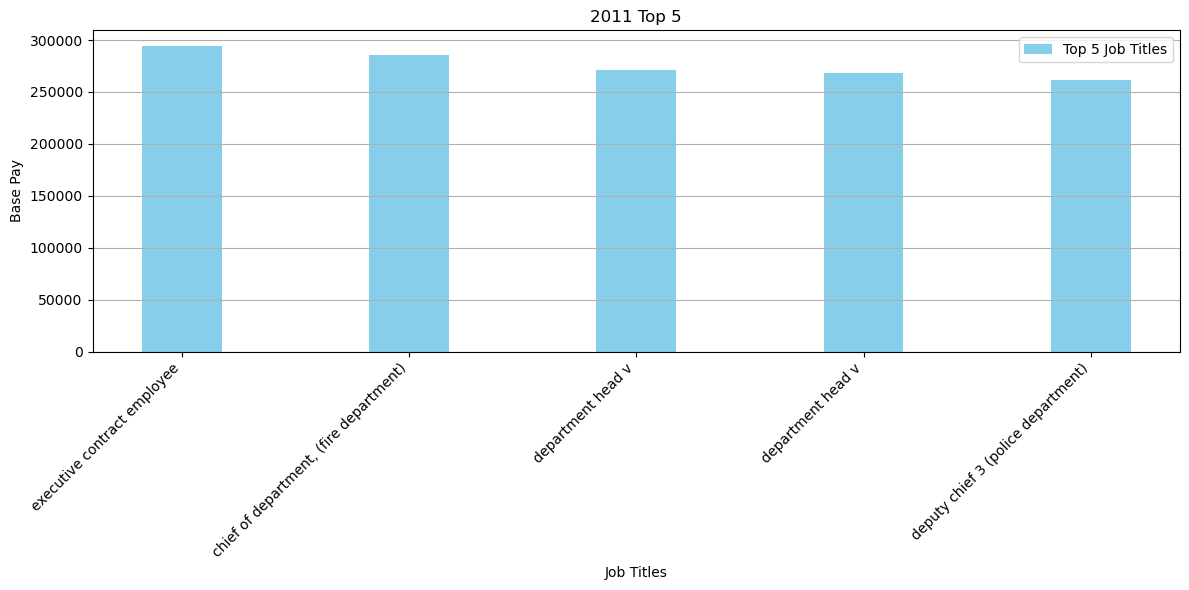

In [25]:

# Sort data to get top 5 and bottom 5 industries 
highest_head_2011 = df_2011.sort_values(by="BasePay", ascending=False).head(5)

# Extracting data for plotting
highest_head_labels = highest_head_2011['JobTitle']
highest_head_values = highest_head_2011['BasePay']



# Combine all labels for x-axis
combined_labels = highest_head_labels.tolist() #+ tail_labels.tolist()

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted figure size for better readability

bar_width = 0.35
index = np.arange(len(combined_labels))

# Use two sets of bars for top and bottom
bars1 = ax.bar(index[:5], highest_head_values, bar_width, label='Top 5 Job Titles', color='skyblue')

# Set labels and title
ax.set_xlabel('Job Titles')
ax.set_ylabel('Base Pay')
ax.set_title('2011 Top 5')
ax.set_xticks(index)
ax.set_xticklabels(combined_labels, rotation=45, ha='right')

# Add a legend
ax.legend()

# Adding grid lines for better readability
ax.yaxis.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
df_2014['BasePay'] = pd.to_numeric(df_2014['BasePay'], errors='coerce')


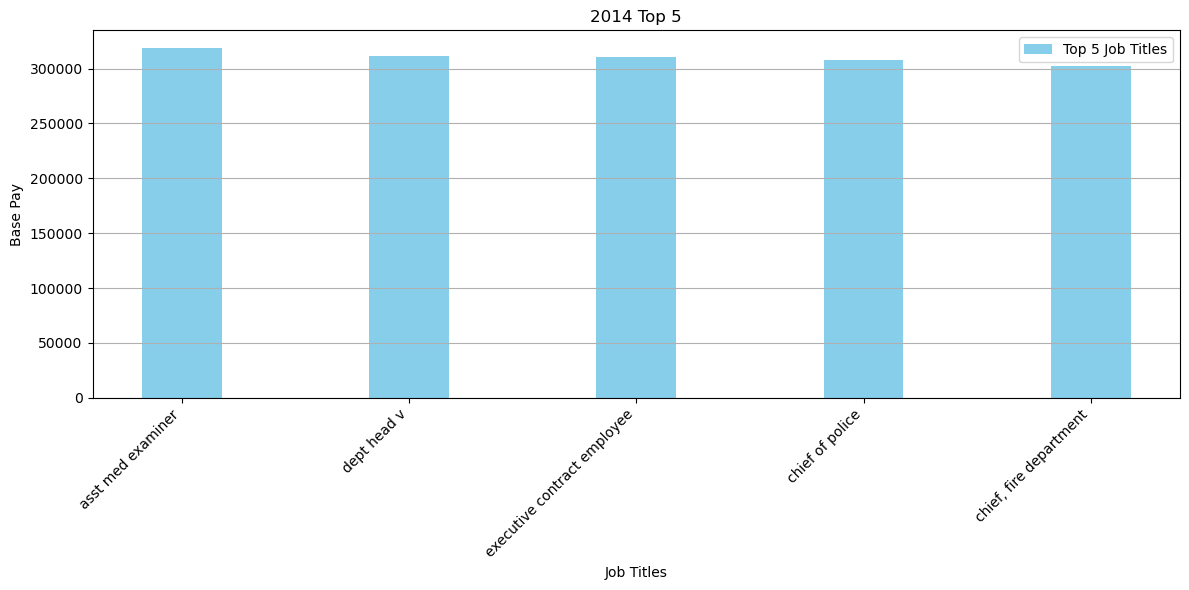

In [27]:
# Sort data to get top 5 and bottom 5 Base Pay
highest_head_2014 = df_2014.sort_values(by="BasePay", ascending=False).head(5)


# Extracting data for plotting
highest_head_labels = highest_head_2014['JobTitle']
highest_head_values = highest_head_2014['BasePay']


# Combine all labels for x-axis
combined_labels = highest_head_labels.tolist() 

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted figure size for better readability

bar_width = 0.35
index = np.arange(len(combined_labels))

# Use two sets of bars for top and bottom
bars1 = ax.bar(index[:5], highest_head_values, bar_width, label='Top 5 Job Titles', color='skyblue')


# Set labels and title
ax.set_xlabel('Job Titles')
ax.set_ylabel('Base Pay')
ax.set_title('2014 Top 5')
ax.set_xticks(index)
ax.set_xticklabels(combined_labels, rotation=45, ha='right')

# Add a legend
ax.legend()

# Adding grid lines for better readability
ax.yaxis.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Top 50 jobs 
![Workers](data\jobs.jpg)

We have taken the top 50 jobs and categorized them into different job categories that best fit their titles. 

- Taken the top 50 job titles 
- Categorize them into lists and created: Healthcare, Transporatation, Maintenance and Operations, Emergency Safety, Public Safety, Social and Public Services, Professional_Administrative_Support Services, FoodService and Engineering. 
- Added a JobCategoryEncoded to know what number is associated to each of the Job Categories: 
  - 0.Emergency Safety
  - 1 .Engineering	
  - 2.Food Service
  - 3.Healthcare	
  - 4.Maintenance and Operations	
  - 5.Professional_Administrative_Support Services
  - 6.Public Safety	
  - 7.Social and Public Services
  - 8.Transportation	

- After getting the dataframe that would prepare for the machine learning, we created a CSV titled - UPDATEDJobSalariesSF.csv for the next step

In [28]:
#Display updated salaries dataframe
salaries.head(50)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
Id,,,,,,,,
1,nathaniel ford,general manager-metropolitan transit authority,167411.18,0.0,400184.25,567595.43,567595.43,2011
2,gary jimenez,captain 3 (police department),155966.02,245131.88,137811.38,538909.28,538909.28,2011
3,albert pardini,captain 3 (police department),212739.13,106088.18,16452.6,335279.91,335279.91,2011
4,christopher chong,wire rope cable maintenance mechanic,77916.0,56120.71,198306.9,332343.61,332343.61,2011
5,patrick gardner,"deputy chief of department,(fire department)",134401.6,9737.0,182234.59,326373.19,326373.19,2011
6,david sullivan,assistant deputy chief 2,118602.0,8601.0,189082.74,316285.74,316285.74,2011
7,alson lee,"battalion chief, (fire department)",92492.01,89062.9,134426.14,315981.05,315981.05,2011
8,david kushner,deputy director of1nvestments,256576.96,0.0,51322.5,307899.46,307899.46,2011
9,michael morris,"battalion chief, (fire department)",176932.64,86362.68,40132.23,303427.55,303427.55,2011


In [29]:
#Check the count of Job titles from highest to lowest

# Count the occurrences of each JobTitle
Jobtitle_salary = salaries.groupby('JobTitle').size().reset_index(name='Count')

# Sort by Count to see the most common job titles
Jobtitle_salary = Jobtitle_salary.sort_values(by='Count', ascending=False)

# Display the first few rows
print(Jobtitle_salary.head())


              JobTitle  Count
1489  transit operator   9424
1348     special nurse   5791
1149  registered nurse   4955
416          custodian   3214
1039  police officer 3   3200


In [30]:
#Display dataframe
Jobtitle_salary.head(50)

,JobTitle,Count
1489,transit operator,9424
1348,special nurse,5791
1149,registered nurse,4955
416,custodian,3214
1039,police officer 3,3200
604,firefighter,3153
1146,recreation leader,2663
462,deputy sheriff,2618
1134,public svc aide-public works,2518
983,patient care assistant,1945


In [31]:
# Assuming Jobtitle_salary is your original DataFrame
first_50_df = Jobtitle_salary.head(50)
# Display the new DataFrame
print(first_50_df)

                                 JobTitle  Count
1489                     transit operator   9424
1348                        special nurse   5791
1149                     registered nurse   4955
416                             custodian   3214
1039                     police officer 3   3200
604                           firefighter   3153
1146                    recreation leader   2663
462                        deputy sheriff   2618
1134         public svc aide-public works   2518
983                patient care assistant   1945
1133               public service trainee   1656
160             attorney (civil/criminal)   1503
1038                     police officer 2   1502
1037                       police officer   1476
1044                               porter   1465
620                       general laborer   1410
618                              gardener   1187
970               parking control officer   1140
797                          library page   1107
1198                

 We created this visual to gain an understanding of the data, which prompted us to assign the Job Titles to Job Categories to make the data more manageable.  We are glad we did because it took us in a different direction that allowed more accurate machine learning in the end.

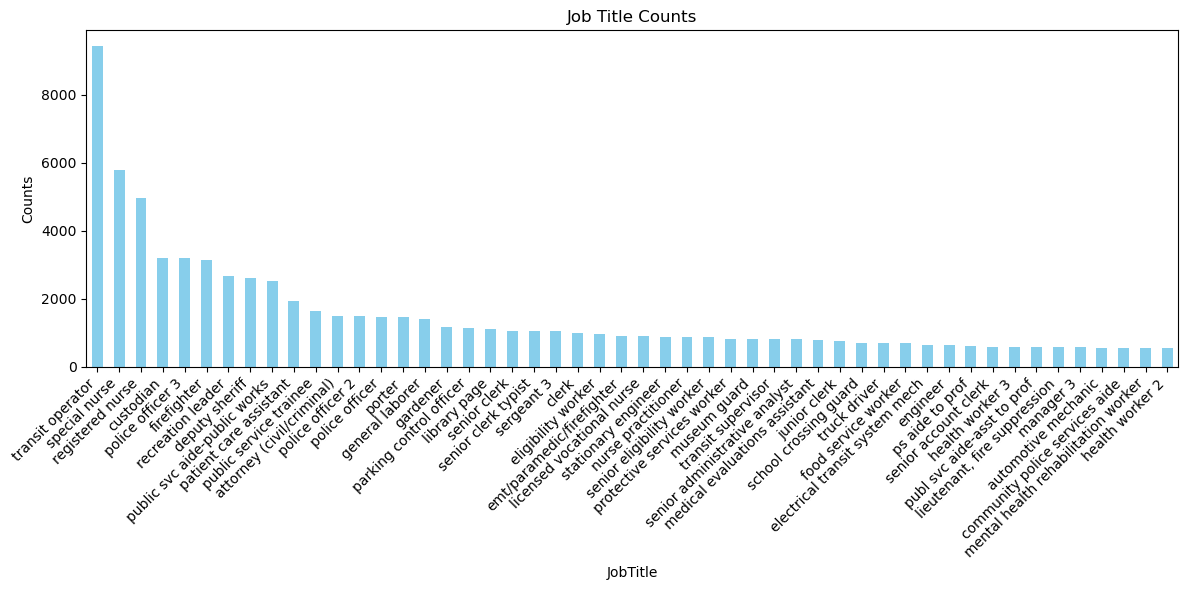

In [32]:
#Create visualization for understanding
job_counts = first_50_df.groupby('JobTitle')['Count'].sum().sort_values(ascending=False)
# Plotting
plt.figure(figsize=(12, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Job Title Counts')
plt.xlabel('JobTitle')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

## Separating The Top 50 Jobs into Categories 

![categories](data\cateogories.png)

This is where we assigned the job titles to the categories: Healthcare, Transportation, Maintenance and Operations, Emergency Safety, Public Safety, Social and Public services, Professiona_Admin_Support Services, Food Service and Engineering

In [33]:
#Creating the list 
healthcare_titles = [
    'special nurse',
    'registered nurse',
    'patient care assistant',
    'licensed vocational nurse',
    'nurse practitioner',
    'medical evaluations assistant',
    'health worker 3',
    'mental health rehabilitation worker',
    'health worker 2'
]

#Using job_title_mapping, creating the title of the list
job_title_mapping = {}
for title in healthcare_titles: 
    job_title_mapping[title] = 'Healthcare'
    

In [34]:
#Creating the list 
transportation_titles = [
    'transit operator', 
    'truck driver', 
    'transit supervisor', 
    'electrical transit system mech'
]

#Using job_title_mapping, creating the title of the list
job_title_mapping = {}
for title in transportation_titles: 
    job_title_mapping[title] = 'Transportation'

In [35]:
#Creating the list 
maintenance_operations_title = [
    'custodian', 
    'general laborer', 
    'gardener', 
    'porter', 
    'automotive mechanic'
]

#Using job_title_mapping, creating the title of the list
job_title_mapping = {}
for title in maintenance_operations_title: 
    job_title_mapping[title] = 'Maintenance and Operations'

In [36]:
#Creating the list 
emergency_safety_titles = [
    'firefighter', 
    'emt/paramedic/firefighter',
    'sergeant 3','lieutenant,fire suppression', 
    'police officer 3', 
    'deputy sheriff', 
    'police officer 2', 
    'police officer', 
    'community police services aide'
]

#Using job_title_mapping, creating the title of the list
job_title_mapping = {}
for title in emergency_safety_titles: 
    job_title_mapping[title] = 'Emergency Safety'

In [37]:
#Creating the list 
public_safety_title = [
    'parking control officer', 
    'school crossing guard', 
    'museum guard'
]

#Using job_title_mapping, creating the title of the list
job_title_mapping = {}
for title in public_safety_title: 
    job_title_mapping[title] = 'Public Safety'

In [38]:
#Creating the list 
social_public_services_title = [
    'public svc aide-public works', 
    'public service trainee', 
    'eligibility worker', 
    'protective services worker'
]

#Using job_title_mapping, creating the title of the list
job_title_mapping = {}
for title in social_public_services_title: 
    job_title_mapping[title] = 'Social and Public Services'

In [39]:
#Creating the list 
prof_admin_support_serv_title = [
    'ps aide to prof', 
    'publ svc aide-asst to prof', 
    'attorney (civil/criminal)', 
    'senior clerk', 
    'senior clerk typist', 
    'clerk', 
    'junior clerk', 
    'manager 3', 
    'library page'
]

#Using job_title_mapping, creating the title of the list
job_title_mapping = {}
for title in prof_admin_support_serv_title: 
    job_title_mapping[title] = 'Professional_Administrative_Support Services'

In [40]:
#Creating the list 
food_service_title = [
    'food service worker'
]

#Using job_title_mapping, creating the title of the list
job_title_mapping = {}
for title in food_service_title: 
    job_title_mapping[title] = 'Food Service'

In [41]:
#Creating the list 
engineering_title = [
    'engineer', 'stationary engineer'
]

#Using job_title_mapping, creating the title of the list
job_title_mapping = {}
for title in engineering_title: 
    job_title_mapping[title] = 'Engineering'

We wanted to get all of the different job categories into a for loop and the following into a Dataframe:
- Id, JobTitle, Job Category, TotalBasePay, AvgBasePay, MinBasePay, MaxBasePay, MedianBasePay and StdDevBasePay

In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define job categories and their corresponding job titles
job_categories = {
    'Healthcare': healthcare_titles,
    'Transportation': transportation_titles,
    'Maintenance and Operations': maintenance_operations_title,
    'Emergency Safety': emergency_safety_titles,
    'Public Safety': public_safety_title,
    'Social and Public Services': social_public_services_title,
    'Professional_Administrative_Support Services': prof_admin_support_serv_title,
    'Food Service': food_service_title,
    'Engineering': engineering_title   
}

# Initialize a list to hold results for all categories
all_categories_data = []

# Iterate through each job category
for category, titles in job_categories.items():
    # Filter the salaries DataFrame for the current category
    category_salaries = salaries[salaries['JobTitle'].isin(titles)].copy()

    # Map the job category
    category_salaries['JobCategory'] = category  # Set JobCategory for the current category

    # Ensure BasePay is numeric and coerce any errors (non-numeric values) to NaN
    category_salaries['BasePay'] = pd.to_numeric(category_salaries['BasePay'], errors='coerce')

    # Fill NaN values with 0 (or you can drop these rows if preferred)
    category_salaries['BasePay'].fillna(0, inplace=True)

    # Perform the groupby and aggregation
    category_aggregated = category_salaries.groupby('JobTitle').agg(
        TotalBasePay=('BasePay', 'sum'),
        AvgBasePay=('BasePay', 'mean'),
        MinBasePay=('BasePay', 'min'),
        MaxBasePay=('BasePay', 'max'),
        MedianBasePay=('BasePay', 'median'),
        StdDevBasePay=('BasePay', 'std'),
    ).reset_index()

    # Add the JobCategory to the aggregated DataFrame
    category_aggregated['JobCategory'] = category

    # Round the numerical values
    for col in ['TotalBasePay', 'AvgBasePay', 'MinBasePay', 'MaxBasePay', 'MedianBasePay', 'StdDevBasePay']:
        category_aggregated[col] = category_aggregated[col].round(0)

    # Append the results for the current category to the list
    all_categories_data.append(category_aggregated)

# Combine all category data into a single DataFrame
combined_categories_data = pd.concat(all_categories_data, ignore_index=True)

# Remove dollar formatting from AvgBasePay to ensure proper numeric sorting
combined_categories_data['AvgBasePay'] = pd.to_numeric(combined_categories_data['AvgBasePay'], errors='coerce')

# Sort the DataFrame by AvgBasePay in descending order (highest to lowest)
combined_categories_sorted = combined_categories_data.sort_values(by='AvgBasePay', ascending=False)

# Apply dollar formatting again after sorting
money_cols = ['TotalBasePay', 'AvgBasePay', 'MinBasePay', 'MaxBasePay', 'MedianBasePay', 'StdDevBasePay']
for col in money_cols:
    combined_categories_sorted[col] = combined_categories_sorted[col].apply(lambda x: f"${x:,.0f}")

# Reorder the columns to have JobCategory as the second column
combined_categories_sorted = combined_categories_sorted[['JobTitle', 'JobCategory', 'TotalBasePay', 'AvgBasePay', 'MinBasePay', 'MaxBasePay', 'MedianBasePay', 'StdDevBasePay']]

# Display the sorted DataFrame with JobCategory in the second column
print(combined_categories_sorted.head(50))


                               JobTitle  \
33            attorney (civil/criminal)   
25                           sergeant 3   
43                             engineer   
37                            manager 3   
23                     police officer 2   
24                     police officer 3   
20            emt/paramedic/firefighter   
21                          firefighter   
7                      registered nurse   
5                    nurse practitioner   
19                       deputy sheriff   
22                       police officer   
30           protective services worker   
11                   transit supervisor   
9        electrical transit system mech   
13                  automotive mechanic   
44                  stationary engineer   
12                         truck driver   
18       community police services aide   
15                             gardener   
1                       health worker 3   
10                     transit operator   
2          

We had to create a numeric code that represents each category so when we do the Machine Learning, it would read it as a numeric value. This was preparation to process smoothly. 

- 0.Emergency Safety
- 1 .Engineering	
- 2.Food Service
- 3.Healthcare	
- 4.Maintenance and Operations	
- 5.Professional_Administrative_Support Services
- 6.Public Safety	
- 7.Social and Public Services
- 8.Transportation	



In [43]:
# load in from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the JobCategory column
combined_categories_sorted['JobCategoryEncoded'] = label_encoder.fit_transform(combined_categories_sorted['JobCategory'])

In [44]:
#Display the dataframe
combined_categories_sorted.head(10)

,JobTitle,JobCategory,TotalBasePay,AvgBasePay,MinBasePay,MaxBasePay,MedianBasePay,StdDevBasePay,JobCategoryEncoded
33,attorney (civil/criminal),Professional_Administrative_Support Services,"$200,062,150","$133,109",$0,"$193,686","$147,186","$47,026",5
25,sergeant 3,Emergency Safety,"$136,906,198","$130,760",$0,"$148,374","$137,982","$25,927",0
43,engineer,Engineering,"$76,114,119","$120,816",$0,"$194,905","$123,747","$29,948",1
37,manager 3,Professional_Administrative_Support Services,"$64,339,092","$112,678",$0,"$158,493","$125,656","$35,620",5
23,police officer 2,Emergency Safety,"$164,325,621","$109,405",$0,"$126,864","$114,043","$17,314",0
24,police officer 3,Emergency Safety,"$344,441,284","$107,638",$0,"$131,105","$117,171","$27,871",0
20,emt/paramedic/firefighter,Emergency Safety,"$93,030,112","$101,340",$0,"$154,575","$111,544","$33,736",0
21,firefighter,Emergency Safety,"$318,952,999","$101,159",$0,"$139,171","$109,784","$25,087",0
7,registered nurse,Healthcare,"$498,104,708","$100,526",$0,"$174,045","$108,542","$31,838",3
5,nurse practitioner,Healthcare,"$79,239,487","$89,943",$0,"$190,134","$97,093","$61,544",3


In [45]:
# Remove the JobCategory column
combined_categories_sorted = combined_categories_sorted.drop(columns=['JobCategory'])

In [46]:
# Reorder the columns to have JobCategoryEncoded as the second column
combined_categories_sorted = combined_categories_sorted[['JobTitle', 'JobCategoryEncoded'] + 
                                                        [col for col in combined_categories_sorted.columns if col not in ['JobTitle', 'JobCategoryEncoded']]]

# Display the updated DataFrame
combined_categories_sorted.head(50)

,JobTitle,JobCategoryEncoded,TotalBasePay,AvgBasePay,MinBasePay,MaxBasePay,MedianBasePay,StdDevBasePay
33,attorney (civil/criminal),5,"$200,062,150","$133,109",$0,"$193,686","$147,186","$47,026"
25,sergeant 3,0,"$136,906,198","$130,760",$0,"$148,374","$137,982","$25,927"
43,engineer,1,"$76,114,119","$120,816",$0,"$194,905","$123,747","$29,948"
37,manager 3,5,"$64,339,092","$112,678",$0,"$158,493","$125,656","$35,620"
23,police officer 2,0,"$164,325,621","$109,405",$0,"$126,864","$114,043","$17,314"
24,police officer 3,0,"$344,441,284","$107,638",$0,"$131,105","$117,171","$27,871"
20,emt/paramedic/firefighter,0,"$93,030,112","$101,340",$0,"$154,575","$111,544","$33,736"
21,firefighter,0,"$318,952,999","$101,159",$0,"$139,171","$109,784","$25,087"
7,registered nurse,3,"$498,104,708","$100,526",$0,"$174,045","$108,542","$31,838"
5,nurse practitioner,3,"$79,239,487","$89,943",$0,"$190,134","$97,093","$61,544"


In [47]:
#ml save CSV
# Save the sorted DataFrame to a CSV file
combined_categories_sorted.to_csv('UPDATEDJobSalariesSF.csv', index=False)


## Preparing the Data to Fit the Linear Regression Model 

![machine learning](data\machine-learning.png)

In [48]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [49]:
# Define the file path to your CSV file
file_path = r'UPDATEDJobSalariesSF.csv'

# Read the salary data from the CSV file
df_salaries = pd.read_csv(file_path)

# Display the first few rows to check data
print(df_salaries.head())

                    JobTitle  JobCategoryEncoded  TotalBasePay AvgBasePay  \
0  attorney (civil/criminal)                   5  $200,062,150   $133,109   
1                 sergeant 3                   0  $136,906,198   $130,760   
2                   engineer                   1   $76,114,119   $120,816   
3                  manager 3                   5   $64,339,092   $112,678   
4           police officer 2                   0  $164,325,621   $109,405   

  MinBasePay MaxBasePay MedianBasePay StdDevBasePay  
0         $0   $193,686      $147,186       $47,026  
1         $0   $148,374      $137,982       $25,927  
2         $0   $194,905      $123,747       $29,948  
3         $0   $158,493      $125,656       $35,620  
4         $0   $126,864      $114,043       $17,314  


Initially we were having issues with the columns and the symbols which affected the model. We ended up cleaning the remaining columns. Because we encountered our JobCategories into a numerical value, this helped create a smoother process. 

In [50]:
# List of columns to clean
columns_to_clean = ['TotalBasePay', 'AvgBasePay', 'MinBasePay', 'MaxBasePay', 'MedianBasePay', 'StdDevBasePay']

# Clean the specified columns by removing $ and commas
for column in columns_to_clean:
    df_salaries[column] = df_salaries[column].replace({'\$': '', ',': ''}, regex=True)

# Convert the cleaned columns to float
for column in columns_to_clean:
    df_salaries[column] = pd.to_numeric(df_salaries[column], errors='coerce')

# Check for NaN values after conversion
print("Number of NaN values in the cleaned columns:")
print(df_salaries[columns_to_clean].isnull().sum())

# Drop rows where any of the relevant columns are NaN
df_salaries.dropna(subset=columns_to_clean, inplace=True)

Number of NaN values in the cleaned columns:
TotalBasePay     0
AvgBasePay       0
MinBasePay       0
MaxBasePay       0
MedianBasePay    0
StdDevBasePay    0
dtype: int64


In [51]:
# One-hot encode categorical variables
df_salaries = pd.get_dummies(df_salaries, columns=['JobCategoryEncoded'])

In [52]:
# Define features and target variable
X = df_salaries.drop(columns=['AvgBasePay','JobTitle','TotalBasePay'])  # Features should exclude the target variable
y = df_salaries['AvgBasePay']  # The target variable should be the salary

In [53]:
X.head()

,MinBasePay,MaxBasePay,MedianBasePay,StdDevBasePay,JobCategoryEncoded_0,JobCategoryEncoded_1,JobCategoryEncoded_2,JobCategoryEncoded_3,JobCategoryEncoded_4,JobCategoryEncoded_5,JobCategoryEncoded_6,JobCategoryEncoded_7,JobCategoryEncoded_8
0,0,193686,147186,47026,False,False,False,False,False,True,False,False,False
1,0,148374,137982,25927,True,False,False,False,False,False,False,False,False
2,0,194905,123747,29948,False,True,False,False,False,False,False,False,False
3,0,158493,125656,35620,False,False,False,False,False,True,False,False,False
4,0,126864,114043,17314,True,False,False,False,False,False,False,False,False


In [54]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Create a Linear Regression model
model = LinearRegression()

In [56]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [57]:
#prediction model
predictions = model.predict(X_test)

In [58]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R^2 Score:", r2_score(y_test, predictions))


Mean Squared Error: 30247862.460506167
R^2 Score: 0.9774144091293482


Creating the visuals for our Linear Regression Model

In [59]:
#Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt


## Regression Plot: Actual vs Predicted SF Salary Analysis: 

Based on the linear regression model, this plot shows the relationship between the actual and predicted SF Salary within the City Government. The blue dots within the plot shows a data point and the red line represents the regression line. This shows us that the model has learned both the acutal and predicted values. Based on the red shade around the trend line represents the confidence interval.This shows the uncertainty/variability around the trend line. Near the regression line are the blue dots which indicates a good model fit. Although this indicates a good model fit, the model aslso predicts that there are some values better than others. Within the low to mid salary range, there are some dots that are away from the line compared to others. 

Overall - the points are relatively close to the line which suggests the model is making reasonably accurate predictions for salaries.  

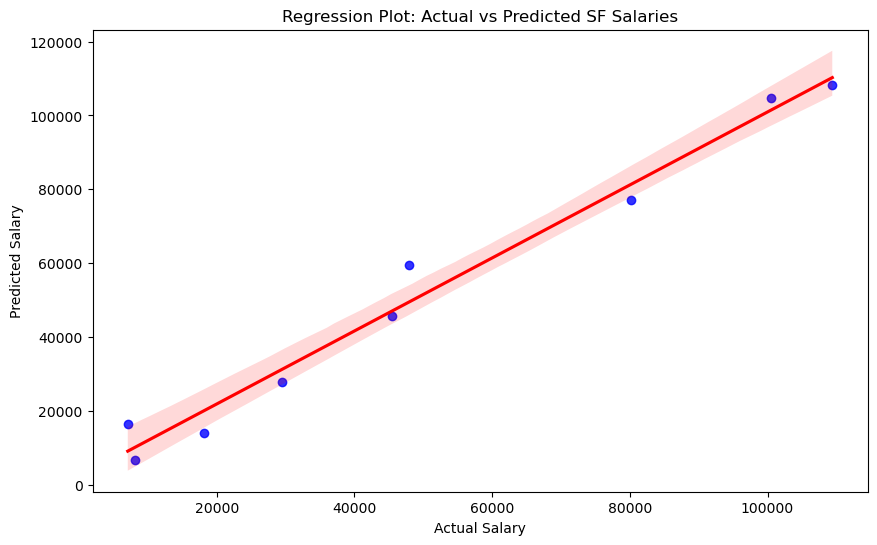

In [60]:
#Regression Plot for SF Salaries - Actual Vs Predicted
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=predictions, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Regression Plot: Actual vs Predicted SF Salaries")
plt.show()


SF Salaries - Box plot : Actual vs Predicted 

Based the box plot shown, the model does a great job on the prediction of SF Salaries. This shows that the salaries are close compared to the actual values. Using this visual helps people understand how relatively close the Actual and the Predicted box plots are, and how the model is reasonably accurate. 

- The line within the box represents the median and both have very similiar postions. 
- Both have similar interquartertile ranges (IQR) and the spread are very close between the actual and predicted. 
- The whiskers of both plots have a similar range - captures the range of the actual salaries. 
- There are no points outside the whiskers, indicating there aren't any major outliers. 

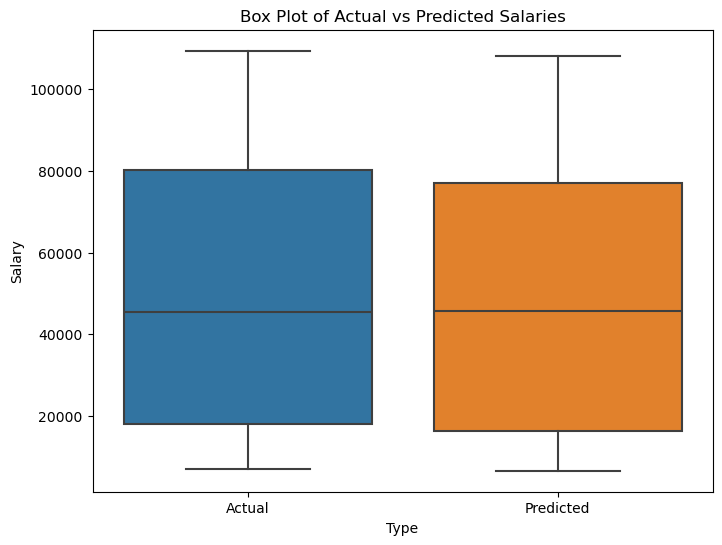

In [61]:
# Create a DataFrame to store actual and predicted salaries
salary_comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})

# Melt the DataFrame to have 'Actual' and 'Predicted' as one column
salary_comparison_melt = salary_comparison_df.melt(var_name='Type', value_name='Salary')

# Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Salary', data=salary_comparison_melt)
plt.title("Box Plot of Actual vs Predicted Salaries")
plt.show()


In [62]:
#creating the baseline for linear regression model for the target variables 
baseline_linear = y.mean()
baseline_linear

58721.444444444445

## Random Forest

Because we are aiming for prediction of salaries - we decided to go with Random Forest Regressor. 

In [63]:
#import required libraries
from sklearn.ensemble import RandomForestRegressor

In [64]:
#Define features and target variable
X = df_salaries.drop(columns=['AvgBasePay','JobTitle','TotalBasePay'])  # Features should exclude the target variable
Y = df_salaries['AvgBasePay']  # The target variable should be the salary

In [65]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [66]:
#Implenting Randomr Forest Regressor 
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)  # Adjust parameters as needed

# Fit the model
rf_model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [67]:
#Create prediction for model
Y_pred = rf_model.predict(X_test)

In [68]:
#Evaluate the model 
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 110962989.54713611
R² Score: 0.9171457260172265


### Best Parameters: 

- max_depth : 10 
  - This is the maximum depth of the trees in the forest, this means this will have a depth of a max of 10 levels.
- max_features: 'sqrt' 
  - The model will look for a random subset of features (square root of total numbers of features) when it is looking for the best split at each node
- min_samples_leaf: 1
  - Sets the minimum and one means one sample can be created with one leaf node.
- min_samples_split: 2
  - This is the minimum required number of samples to split an internal node.
- n-estimator:200 
  - This means the model will use 200 trees in the forest.

In [69]:
#Optimal Hyperparameters for Random Forest Regressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'], 
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Creating visuals for prediction of salary by job category 

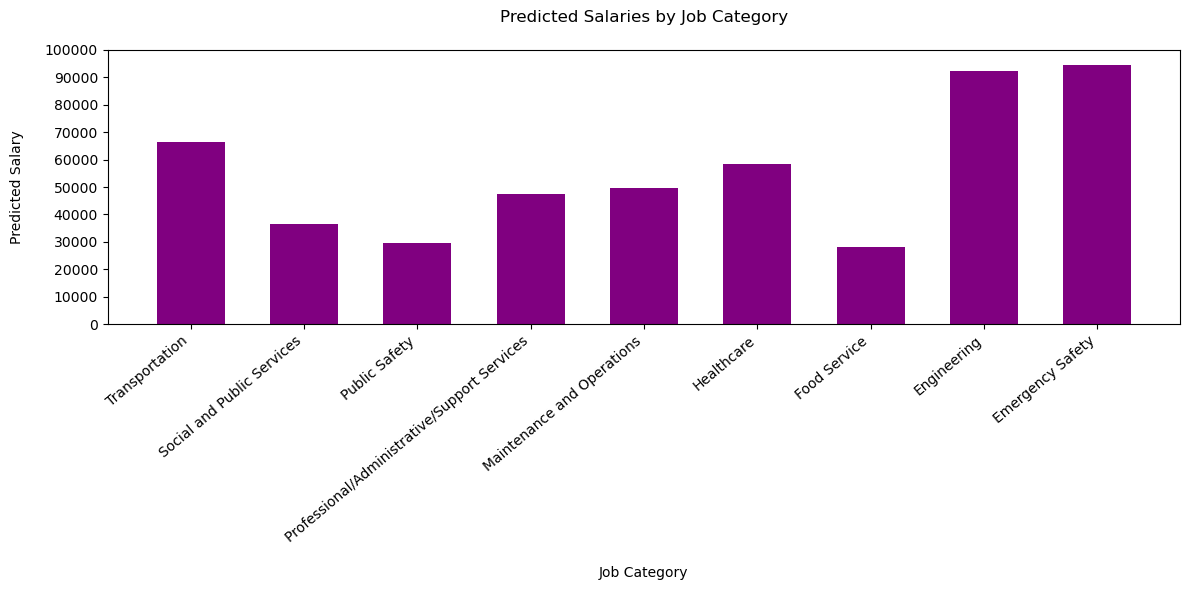

In [70]:
# Define job titles for each encoded job category
job_titles = [
    'Emergency Safety',                                 # JobCategoryEncoded_0
    'Engineering',                                      # JobCategoryEncoded_1
    'Food Service',                                     # JobCategoryEncoded_2
    'Healthcare',                                       # JobCategoryEncoded_3
    'Maintenance and Operations',                       # JobCategoryEncoded_4
    'Professional/Administrative/Support Services',     # JobCategoryEncoded_5
    'Public Safety',                                    # JobCategoryEncoded_6
    'Social and Public Services',                       # JobCategoryEncoded_7
    'Transportation'                                    # JobCategoryEncoded_8
]

# Predict salaries using the rf_model 
df_salaries['predicted_salary'] = rf_model.predict(X)

# Create a bar plot for predicted salaries by job category
plt.figure(figsize=(12, 6))  # Adjusted figure size for better spacing

# Group by multiple JobCategoryEncoded columns and compute the mean predicted salary
category_means = df_salaries.groupby([  # Grouping by all job category encodings
    'JobCategoryEncoded_0', 'JobCategoryEncoded_1', 'JobCategoryEncoded_2', 
    'JobCategoryEncoded_3', 'JobCategoryEncoded_4', 'JobCategoryEncoded_5',
    'JobCategoryEncoded_6', 'JobCategoryEncoded_7', 'JobCategoryEncoded_8'
])['predicted_salary'].mean().reset_index()

# Combine the job categories into a readable label for x-axis using the job titles
def encode_to_job_label(row):
    # Select the job titles for the categories where the encoding is True
    selected_titles = [job_titles[i] for i in range(len(job_titles)) if row[i] == 1]
    return ', '.join(selected_titles)  # Combine selected titles into a single string

# Apply the function to create descriptive labels
category_means['job_category_label'] = category_means[[
    'JobCategoryEncoded_0', 'JobCategoryEncoded_1', 'JobCategoryEncoded_2', 
    'JobCategoryEncoded_3', 'JobCategoryEncoded_4', 'JobCategoryEncoded_5',
    'JobCategoryEncoded_6', 'JobCategoryEncoded_7', 'JobCategoryEncoded_8'
]].apply(encode_to_job_label, axis=1)

# Create the bar plot using the descriptive job titles as x-axis labels
bar_width = 0.6  
plt.bar(category_means['job_category_label'], category_means['predicted_salary'], width=bar_width, color='purple')

# Set plot titles and labels
plt.title('Predicted Salaries by Job Category', pad=20) 
plt.xlabel('Job Category', labelpad=15) 
plt.ylabel('Predicted Salary', labelpad=15) 

# Set y-axis ticks to be in increments of 10k
plt.yticks(range(0, int(category_means['predicted_salary'].max()) + 10000, 10000))

# Rotate x-axis labels for better readability and adjust horizontal spacing
plt.xticks(rotation=40, ha='right', fontsize=10)  # 'ha' adjusts horizontal alignment

# Adjust spacing between labels
plt.subplots_adjust(bottom=0.2)  # Adjust bottom spacing

# Ensure layout fits
plt.tight_layout()

# Show the plot
plt.show()

